In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
df.hist(figsize=(15,15))
plt.show()

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

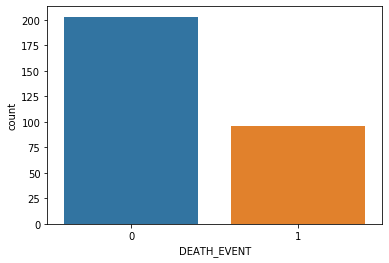

In [5]:
sns.countplot(df.DEATH_EVENT)

In [6]:
df.shape

(299, 13)

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df.platelets[df['platelets'] < 125000].size

11

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
# df.drop(['time', 'serum_creatinine', 'serum_sodium'], axis=1, inplace=True)

In [11]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


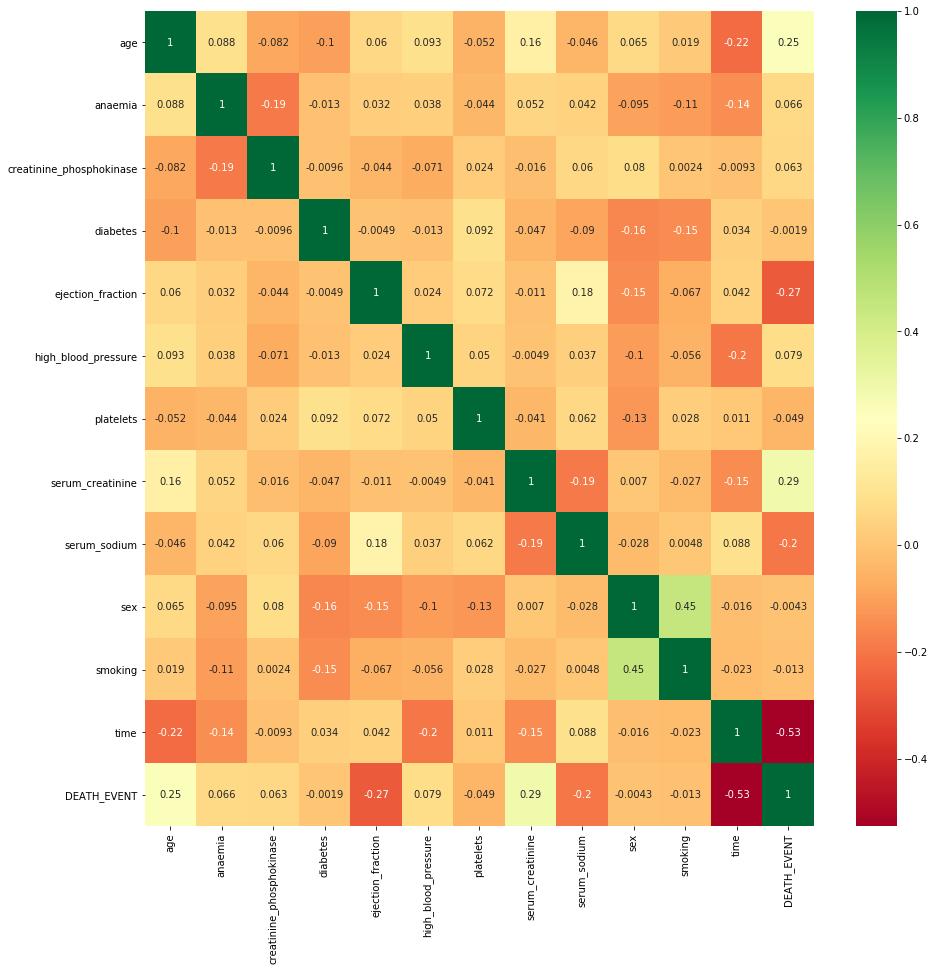

In [12]:
corrmat = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, annot=True, cmap='RdYlGn')

In [13]:
X = df.iloc[:, :-1]

In [14]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [15]:
y = df['DEATH_EVENT']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
print(X_test.shape)
print(X_train.shape)


(60, 12)
(239, 12)


### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [22]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = lr.predict(X_test)

#### Accuracy of the Model

In [24]:
from sklearn.metrics import confusion_matrix, f1_score

In [25]:
print(confusion_matrix(y_test, y_pred))

[[36  1]
 [12 11]]


In [26]:
print(f1_score(y_test, y_pred))

0.6285714285714286


In [27]:
lr.score(X_test, y_test)

0.7833333333333333

### K- Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [48]:
knn_score = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train)
    knn_score.append(score.mean())


In [49]:
(knn_score)

[0.6778368794326242,
 0.6903368794326241,
 0.7322695035460993,
 0.7196808510638297,
 0.753368794326241,
 0.7156914893617021,
 0.7365248226950355,
 0.7156028368794327,
 0.724113475177305,
 0.7197695035460994,
 0.7281914893617023,
 0.7156914893617022,
 0.7240248226950354,
 0.7240248226950354,
 0.7281914893617021,
 0.7156914893617021,
 0.7240248226950354,
 0.7197695035460994,
 0.7281028368794327,
 0.7156028368794327]

Text(0, 0.5, 'Score')

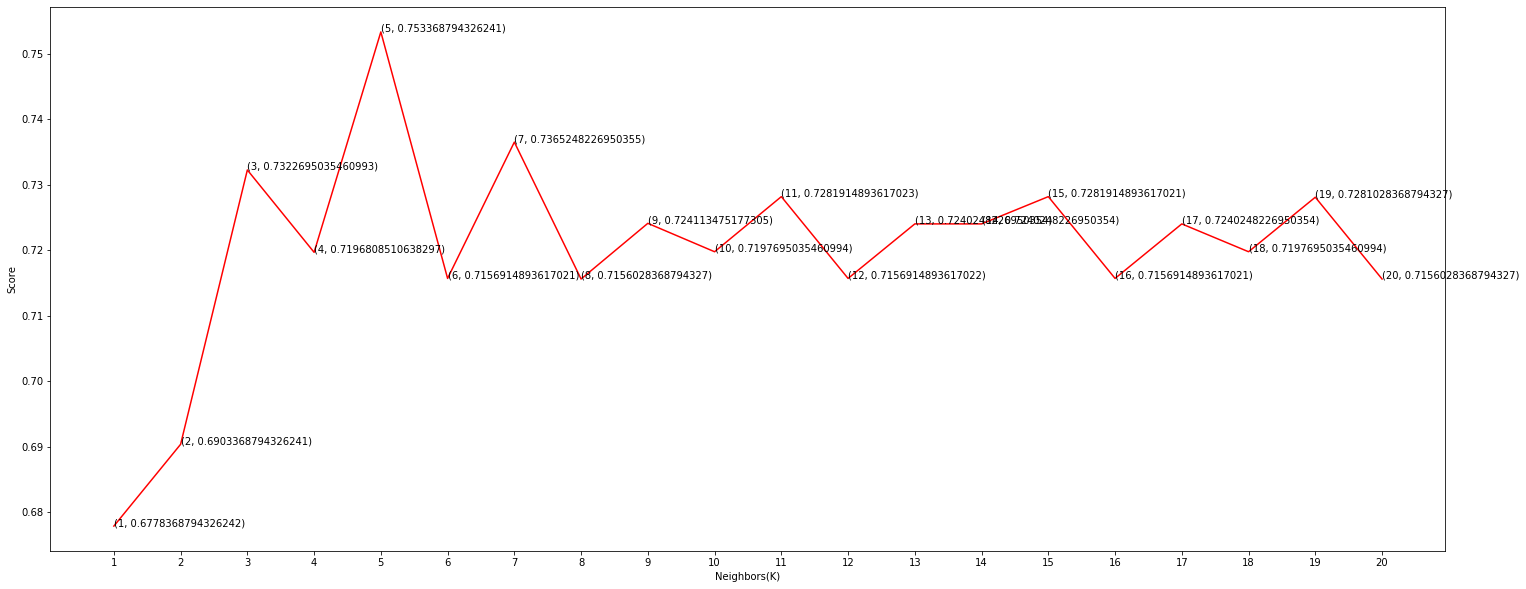

In [50]:
#Determining best value of K using a  graphical plot
plt.figure(figsize=(25,10))
plt.plot([k for k in range(1,21)], knn_score, color="red")
for i in range(1,21):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Neighbors(K)')
plt.ylabel('Score')

In [51]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
y_pred = KNN.predict(X_test)

#### Accuracy of Model

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[35  2]
 [15  8]]
0.48484848484848486
0.7166666666666667
